# Supervised Learning: Classification

### Acknowledgements: Usman Alim 



Further Reading:

* `scikit-learn`: [user guide](https://scikit-learn.org/stable/user_guide.html).


## Quick Overview of scikit-learn

- [`scikit-learn`](https://scikit-learn.org/stable/) is the main machine learning library in the Python data science ecosystem.
- Implements many supervised (classification, regression) and unsupervised (clustering, density estimation, dimensionality reduction) learning algorithms.
- Relies heavily on `numpy`. Inputs and outputs are numpy arrays.
- Input data are expected to be $n \times D$ numerical arrays where $n$ is the number of observations, and $D$ is the number of features.
- Some feature wrangling may be needed, provides methods for feature extraction. 

In [ ]:
# p_data['Tweet'] = data['Tweet'].str.replace('[^a-zA-Z]', ' ')
# p_data

# p_data['Tweet'] = p_data['Tweet'].apply(lambda x: x.lower())
# p_data

In [ ]:
# from nltk.stem import SnowballStemmer
# import string

# stopwords = set(stopwords.words('english'))
# stemmer = SnowballStemmer('english')
# # data['Tweet'] = p_data['Tweet'].apply(word_tokenize)

# def preprocess_text(text):
#     # Remove punctuation
#     text = text.translate(str.maketrans('', '', string.punctuation))
    
#     # Convert to lowercase
#     text = text.lower()
    
#     # Remove stopwords and stem words
#     words = [stemmer.stem(word) for word in text.split() if word not in stopwords]
#     return ' '.join(words)

# p_data['preprocessed_text'] = p_data['Tweet'].apply(preprocess_text)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:

# Data processing related imports
import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# model related imports
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# # load the dataset from the url into pandas dataframe
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'label']
data = pd.read_csv('train.csv')
display(data)
data = data.drop(data.columns[7], axis=1)
data = data[data['Type'] != 'South Dakota']

display(data)

In [ ]:
# Creating DataFrame
p_data = pd.DataFrame(columns=['Tweet', 'following', 'followers', 'actions', 'is_retweet', 'location', 'Type'])
p_data = p_data.append(data)

In [2]:
# Processing data for model

import string
import re

def preprocess_text(raw_tweet):
    # Remove punctuation
    new_string = []
    for word in raw_tweet:
        # Check if the word is a URL
        if "https://" in word or "http://" in word:
            new_string.append(word)
        else:
            word = re.sub(r"[^A-Za-z0-9.\-]", " ", word)
            new_string.append(word)

    # Join the list of words into a string
    string1 = "".join(new_string)
    
    # Replace multiple spaces with a single space
    string1 = re.sub(r"\s+", " ", string1)
    
#     # Remove leading and trailing spaces
#     string1 = string1.strip()
    
    # Convert to lowercase
    string1 = string1.lower()

    return string1

# p_data['preprocessed_text'] = p_data['Tweet'].apply(preprocess_text)
# p_data

In [ ]:
p_data['preprocessed_text'].head(20)

In [ ]:
# Get the feature('Tweet') and lable ('Type') data from a Training and Test dataset
# We use 80% of the dataset to train a model, and use the rest to test the model predictions

# X_train, X_test, y_train, y_test = train_test_split(p_data['preprocessed_text'], 
#                                                     p_data['Type'], test_size=.20, random_state=70)

# random_state = 70 gave us the best accuracy so far. tried varies mubers like  30, 50, 60, 80, 90

# splitting data and writing into csv file for consistent outputs. 



# X_train, X_test = train_test_split(p_data, test_size=.20, random_state=70)

# X_train.to_csv('train80.csv', index=False)
# X_test.to_csv('test20.csv', index=False)


In [9]:
# from geopy.geocoders import Nominatim

# # create a geocoder object
# geolocator = Nominatim(user_agent='my-app')

# # define a function to extract country names
# def get_country(location):
    
#     print("starting")
#     try:
#         # use geocoder to get location information
#         loc = geolocator.geocode(location)
#         # extract country name from location
#         country = loc.raw['address']['country']
#         return country
#     except:
#         # if location information is not available, return None
#         return "unKnown location"




#Start from here:::::::::::

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [3]:
def get_c_vec_test_train(train_feature, test_feature,c_vec):

    # Fit and transform the preprocessed text
    c_vec_train = c_vec.fit_transform(train_feature)
    c_vect_test = c_vec.transform(test_feature)
    
    return c_vec_train, c_vect_test

def get_tf_vec_test_train(train_feature, test_feature, tfid_vec):

    tf_vec_train = tfid_vec.fit_transform(train_feature)
    tf_vec_test = tfid_vec.transform(test_feature)

    return tf_vec_train, tf_vec_test

def get_scalar_test_train(train_feature, test_feature, scaler ):
    train_feature = np.array(train_feature)
    test_feature = np.array(test_feature)
    
    train_feature = train_feature.reshape(-1, 1)
    test_feature = test_feature.reshape(-1, 1)
    
    train_scaled = scaler.fit_transform(train_feature)
    test_scaled = scaler.transform(test_feature)
    
    return  train_scaled, test_scaled
    
                                    
def get_NB(train_feature, test_feature, v_type, vectorizor, model):
     
    y_train = train_feature
    y_test = test_feature
    vectype = v_type
    
    if (vectype == "Count_Vectorizer"):
        vec_train, vect_test = get_c_vec_test_train(train_feature, test_feature, vectorizor)
    elif(vectype == "tfid_Vectorizer"):
        vec_train, vect_test =  get_tf_vec_test_train(train_feature, test_feature, vectorizor)
                                   
    else:
        print("Error with vector type")
     
        
     # Train a Naive Bayes classifier on the count vectorized text
    model.fit(vec_train, y_train)

    # Use the trained classifier to make predictions on the vectorized new text data
    pred_y = model.predict(vect_test)
    
    
    # Compute the accuracy score of the predicted labels
    accuracy = accuracy_score(y_test, pred_y)
    print("accuracy by NB using {} vectorizer: {:.4f}%".format(vectype, accuracy * 100))
    return pred_y
  
    
def get_SVC(train_feature, test_feature, v_type, vectorizor, model):
    
    y_train = train_feature
    y_test = test_feature
    
    vectype = v_type
    
    if (vectype == "Count_Vectorizer"):
        vec_train, vect_test = get_c_vec_test_train(train_feature, test_feature,vectorizor)    
    elif(vectype == "tfid_Vectorizer"):
        vec_train, vect_test =  get_tf_vec_test_train(train_feature, test_feature, vectorizor)
    else:
        print("Error with vector type")
    

    # Train SVM model using Tf vector

    clf.fit(vec_train, y_train)

    pred_y = clf.predict(vect_test)

    # Evaluate model
    accuracy = accuracy_score(y_test, pred_y)
    print("accuracy by SVC using {} vectorizer: {:.4f}%".format( vectype, accuracy * 100))

    return pred_y


# def get_ConfusionMatrix(model, pred_y):
    
#     y_test = test_data['Type']
        

#     cm = confusion_matrix(y_test, pred_y)

#     disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
#     disp.plot()

#     plt.show()
    

# def get_ConMatrix_text(train_data, test_data):

#     get_ConfusionMatrix(nb, 
#                         get_NB(train_data, test_data,"tfid_vec", tfid_vec, nb) )

#     get_ConfusionMatrix(clf,
#                         get_SVC(train_data, test_data,"tfid_vec", tfid_vec, clf) )
    
#     get_ConfusionMatrix(nb, 
#                     get_NB(train_data, test_data,"c_vec", c_vec, nb) )

#     get_ConfusionMatrix(clf,
#                     get_SVC(train_data, test_data,"c_vec", c_vec, clf) )
    


In [13]:
def get_ConfusionMatrix(model, test_data ,pred_y, ax, label):
    y_test = test_data
    cm = confusion_matrix(y_test, pred_y)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=None)
    disp.plot(ax=ax)
    ax.set_title(label)


def print_CMatrix(train_data, test_data, feature):
    fig, axs = plt.subplots(1, 4, figsize=(20, 5))
    labels = ['TF-ID NB', 'Count NB', 'TF-ID SVM', 'Count SVM']
    classifiers = [nb, nb, clf,  clf]
    vectorizers = [tfid_vec, c_vec, tfid_vec, c_vec]
    vectorizer_labels = ['tfid_Vectorizer', 'Count_Vectorizer', 'tfid_Vectorizer', 'Count_Vectorizer']
    all_labels = set(test_data)
    for i in range(4):
        pred_y = get_NB(train_data, test_data, vectorizer_labels[i], vectorizers[i], classifiers[i]) if i < 2 else get_SVC(train_data, test_data, vectorizer_labels[i], vectorizers[i], classifiers[i])
        get_ConfusionMatrix(classifiers[i], test_data ,  pred_y, axs[i], labels[i])

    s = 'Confusion Matrices of ' + feature 
    fig.suptitle(s)
    handles, labels = axs[-1].get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=1)
    plt.show()


In [6]:
train_data = pd.read_csv('train80.csv')
test_data = pd.read_csv('test20.csv')


train_data['followers'] = train_data['followers'].fillna(-1)
test_data['followers'] = test_data['followers'].fillna(-1)

In [7]:
# Defining Naive Bayes classifier 
nb = MultinomialNB()

# Defining SVC model 
clf = SVC(kernel='linear', C=1, gamma='auto')

# Initialize the vectorizer with desired parameters
c_vec = CountVectorizer(max_features=1000)

# Vectorize tweets using TfidfVectorizer
tfid_vec = TfidfVectorizer()


In [8]:
def preprocess_numbers(df_num_col):

    # Convert the numbers to a string representation
    data_str = ["{:.4f}".format(x) for x in df_num_col]
    # document = " ".join(data_str)
    processed_num_list = data_str
    return processed_num_list

In [6]:
train_follower = preprocess_numbers(train_data['followers'])
test_follower = preprocess_numbers(test_data['followers'])

NameError: name 'train_data' is not defined

# Visualizing the results

- We can visualize the results using a confusion matrix
- The confusion matrix tells us exactly how many of each type of flowers the model predicted and what the correct answers are

In [9]:
tweet_train = train_data['preprocessed_text']
tweet_test = test_data['preprocessed_text']

# print_CMatrix(tweet_train, tweet_test,"Tweet")

In [ ]:
print_CMatrix_text(train_follower, test_follower, "followers")

In [4]:
import chardet

with open('train80loc.csv', 'rb') as f:
    result = chardet.detect(f.read())
    
train_data_loc = pd.read_csv('train80loc.csv', encoding='ISO-8859-1')


In [5]:
with open('test20loc.csv', 'rb') as f:
    result = chardet.detect(f.read())
    
test_data_loc = pd.read_csv('test20loc.csv', encoding='ISO-8859-1')

In [11]:
# apply the function to a pandas dataframe column
train_data_loc = train_data_loc['location'].apply(preprocess_text)
test_data_loc = test_data_loc['location'].apply(preprocess_text)

In [15]:
# Concatenate two features
con_loc_train = tweet_train + ' ' + train_data_loc
con_loc_test = tweet_test + ' ' + test_data_loc

MemoryError: Unable to allocate 1.05 GiB for an array with shape (140620600,) and data type float64

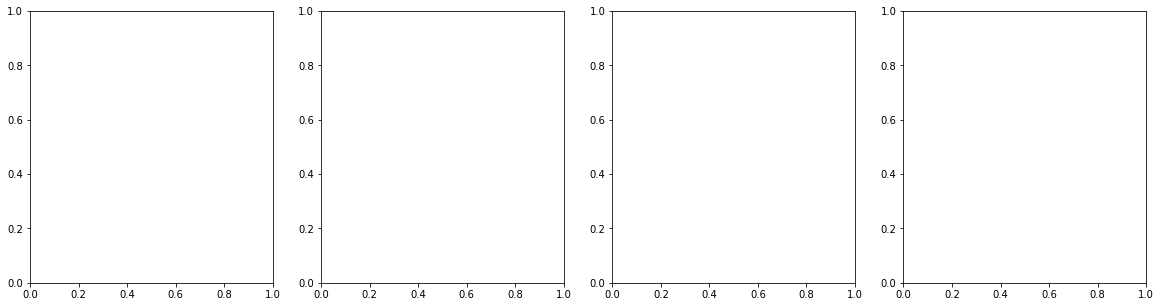

In [20]:
print_CMatrix(con_loc_train, con_loc_test,"location")